#  BMW Car Sales Data Analysis (2010–2024)

#  Project Summary

This project performs an **Exploratory Data Analysis (EDA)** of BMW car sales data from **2010 to 2024**.  
The primary goal is to understand **sales performance**, **customer preferences**, and **market dynamics** by analyzing historical sales records.

##  Problem Statement
The automotive industry is highly competitive, and understanding sales performance across models, regions, fuel types, and customer preferences is critical.  
This notebook explores BMW car sales data from 2010 to 2024, aiming to:

- Analyze sales trends over time  
- Identify top-performing regions and models  
- Explore product features such as fuel type, transmission, engine size, and color  
- Derive insights into customer preferences  
- Support data-driven decisions for marketing and inventory planning  

###  Expected Outcomes
- Identify **best-performing regions and models**  
- Understand **customer preferences** (fuel, transmission, color)  
- Discover **age and price effects** on demand  
- Provide **data-driven insights** for business strategies  


---


In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)  # default size for all plots


---

## 🔍 Data Loading and Overview

We begin by importing the dataset and performing a quick inspection:
- Dataset size (rows & columns)  
- Column names  
- Data types and missing values  
- Preview of first few rows  


In [2]:
# Step 2: Load Data
df = pd.read_csv("../data/BMW sales data (2010-2024).csv")

In [3]:
# Step 3: Quick Overview
print(df.shape)        # rows & columns

(50000, 11)


In [4]:
print(df.columns)      # column names

Index(['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission',
       'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume',
       'Sales_Classification'],
      dtype='object')


In [5]:
df.head()              # first 5 rows

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [6]:
# Data types & missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [7]:
# Count missing values per column
df.isnull().sum()

Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

In [8]:
# Count total duplicate rows
df.duplicated().sum()

np.int64(0)

In [9]:
df['Year'].nunique()

15

In [10]:
df['Model'].nunique()

11

In [11]:
df['Region'].nunique()

6

---

## 🛠️  Feature Engineering

To enrich analysis and enable new insights, we create the following derived features:

- **Revenue** — total revenue per record (Price × Sales Volume).  
  Useful for model-level and region-level profitability analysis, ranking by revenue, and identifying high-value segments.

- **Car_Age** — vehicle age at time of sale (sale year − model/manufacture year).  
  Helps analyze depreciation, demand by vehicle age, and age-related pricing patterns.

This section shows the exact transformations, validation checks, and a few suggested derived buckets (age groups, log-revenue) for modeling and visualization.


In [12]:
df["Revenue"] = df["Price_USD"] * df["Sales_Volume"] 

In [13]:
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Revenue
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,819542000
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,271562732
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,792175410
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,246749637
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,153685840


In [14]:
import datetime
current_year = datetime.datetime.now().year
df["Car_Age"] = current_year - df["Year"]

In [15]:
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Revenue,Car_Age
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,819542000,9
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,271562732,12
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,792175410,3
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,246749637,1
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,153685840,5


### Saving Pre-Processed Dataframe

In [34]:
df.to_csv('final.csv')

---

## 📊 Exploratory Data Analysis (EDA)

In this section, we explore the dataset to understand:
- Distribution of sales volume and revenue  
- Trends across years and months  
- Customer preferences by fuel type, transmission, and color  
- Regional sales differences  

This will set the foundation for deeper analysis and visualization.  


### 🔹 1. Annual Sales Volume and Revenue Trends  

**Goal:** Compare **yearly sales volume** and **revenue** to understand long-term growth, declines, or economic/market impacts.  

**Charts:** Dual line charts (side-by-side).  

**EDA Type:** Temporal (time series analysis).  

**Structure:**  
- **Left Chart:**  
  - X-axis → `Year`  
  - Y-axis → `Sales_Volume_Millions`  
  - Navy line with circle markers  
  - Shows overall demand trends (units sold).  

- **Right Chart:**  
  - X-axis → `Year`  
  - Y-axis → `Revenue_Billions`  
  - Orange line with circle markers  
  - Captures business growth in monetary terms.  


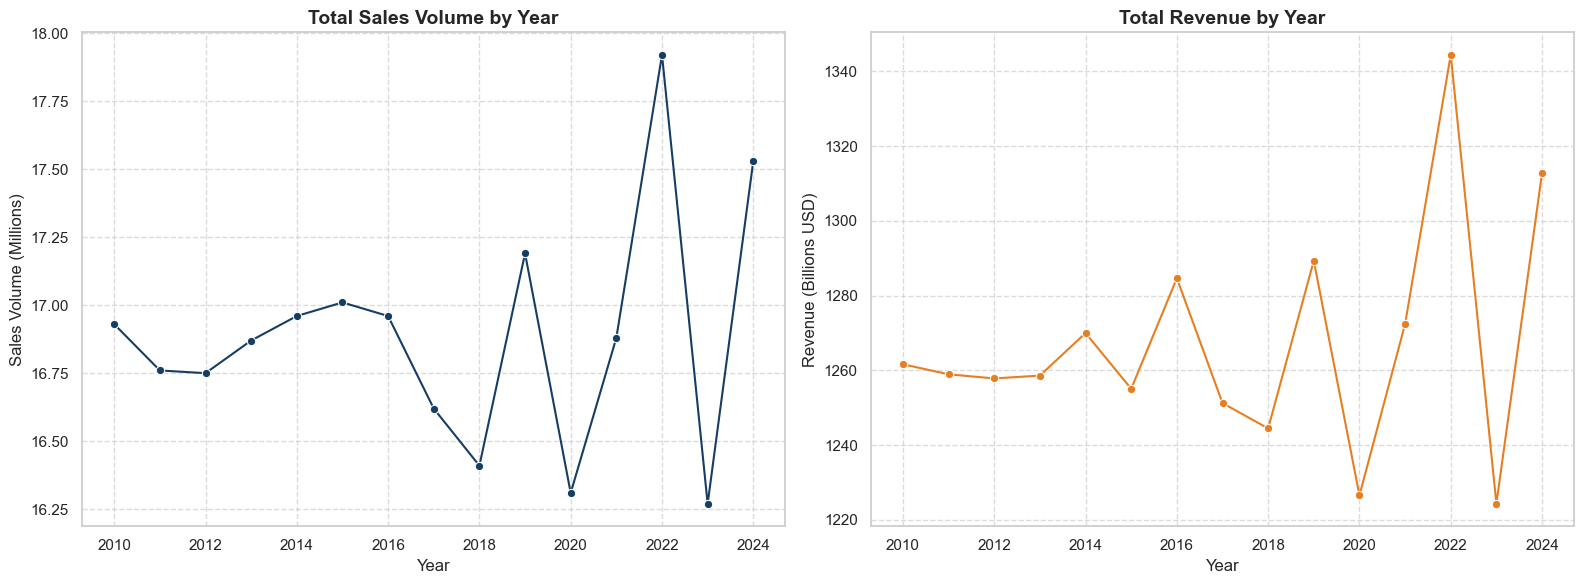

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# --- Sales Volume by Year ---
sales_by_year = df.groupby("Year")["Sales_Volume"].sum().reset_index()
sales_by_year["Sales_Volume_Millions"] = round(sales_by_year["Sales_Volume"]/1e6, 2)

sns.lineplot(data=sales_by_year, x="Year", y="Sales_Volume_Millions", 
             marker="o", color="#163d63", ax=axes[0])
axes[0].set_title("Total Sales Volume by Year", fontsize=14, weight="bold")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Sales Volume (Millions)")
axes[0].grid(True, linestyle="--", alpha=0.7)

# --- Revenue by Year ---
rev_by_year = df.groupby("Year")["Revenue"].sum().reset_index()
rev_by_year["Revenue_Billions"] = round(rev_by_year["Revenue"]/1e9, 2)

sns.lineplot(data=rev_by_year, x="Year", y="Revenue_Billions", 
             marker="o", color="#e67e22", ax=axes[1])
axes[1].set_title("Total Revenue by Year", fontsize=14, weight="bold")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Revenue (Billions USD)")
axes[1].grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


**Insight**:
- **Sales Volume:** Remains steady between `16.3M – 17.9M` from 2010–2024.  
- **Revenue:** Shows higher volatility, peaking in `2022 (~$1.34T)` and dipping in `2023 (~$1.22T)`.  
- Demand is stable, but revenue depends heavily on pricing, product mix, or external market factors.

---

### 🔹 2. Top 10 Models by Sales Volume and Revenue  

**Goal:** Identify the **best-performing BMW models** in terms of both **units sold** and **monetary contribution**, highlighting demand vs profitability differences.  

**Charts:** Dual horizontal bar charts (side-by-side).  

**EDA Type:** Categorical (model-level comparison).  

**Structure:**  
- **Left Chart (Blue):**  
  - X-axis → Units Sold (`Sales_Volume`)  
  - Y-axis → Top 10 models  
  - Highlights demand-driven popularity.  

- **Right Chart (Orange):**  
  - X-axis → Revenue (`Revenue`)  
  - Y-axis → Top 10 models  
  - Highlights profitability and high-value segments.  



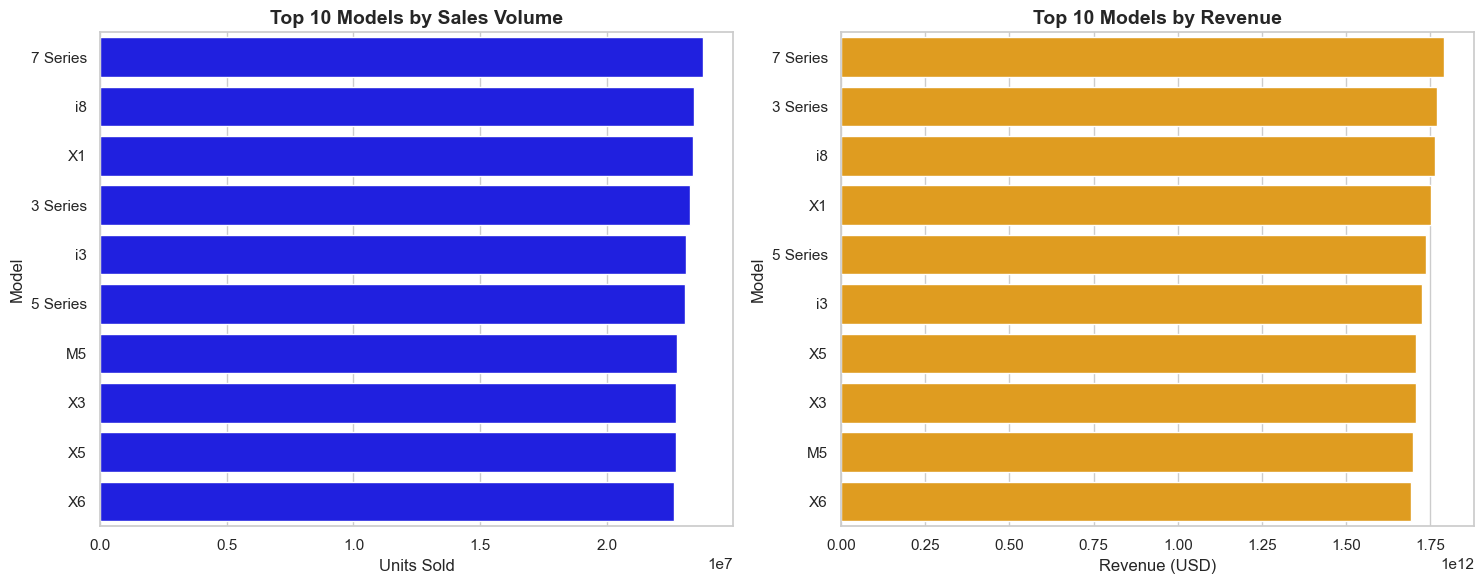

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))

# --- Top 10 Models by Sales Volume ---
top_sales_models = df.groupby("Model")["Sales_Volume"].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_sales_models.values, y=top_sales_models.index, color="Blue", ax=axes[0])
axes[0].set_title("Top 10 Models by Sales Volume", fontsize=14, weight="bold")
axes[0].set_xlabel("Units Sold")
axes[0].set_ylabel("Model")

# --- Top 10 Models by Revenue ---
top_rev_models = df.groupby("Model")["Revenue"].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_rev_models.values, y=top_rev_models.index, color="orange", ax=axes[1])
axes[1].set_title("Top 10 Models by Revenue", fontsize=14, weight="bold")
axes[1].set_xlabel("Revenue (USD)")
axes[1].set_ylabel("Model")

plt.tight_layout()
plt.show()


**Insight:**
  
- Sales Volume: The top models by sales volume range from approximately `1.6M to 2.0M` units sold, with the 7 Series leading and X6 trailing.
- Revenue: The top models by revenue range from approximately `$1.0T to $1.75T`, with the 7 Series again leading and X6 at the lower end.
- The 7 Series consistently performs strongly in both sales volume and revenue, while other models like i8 and X1 show varying rankings, suggesting differences in pricing or market demand influence revenue more than volume alone.

---

### 🔹 3. Regional Sales and Revenue Distribution  

**Goal:** Compare BMW’s **market performance across regions** in terms of both units sold and revenue generated.  

**Charts:** Dual horizontal bar charts (side-by-side).  

**EDA Type:** Categorical (geographic/market comparison).  

**Structure:**  
- **Left Chart (Blue):**  
  - X-axis → Sales Volume in millions  
  - Y-axis → Regions  
  - Shows demand concentration by geography.  

- **Right Chart (Orange):**  
  - X-axis → Revenue in billions USD  
  - Y-axis → Regions  
  - Highlights profitability of each market.  



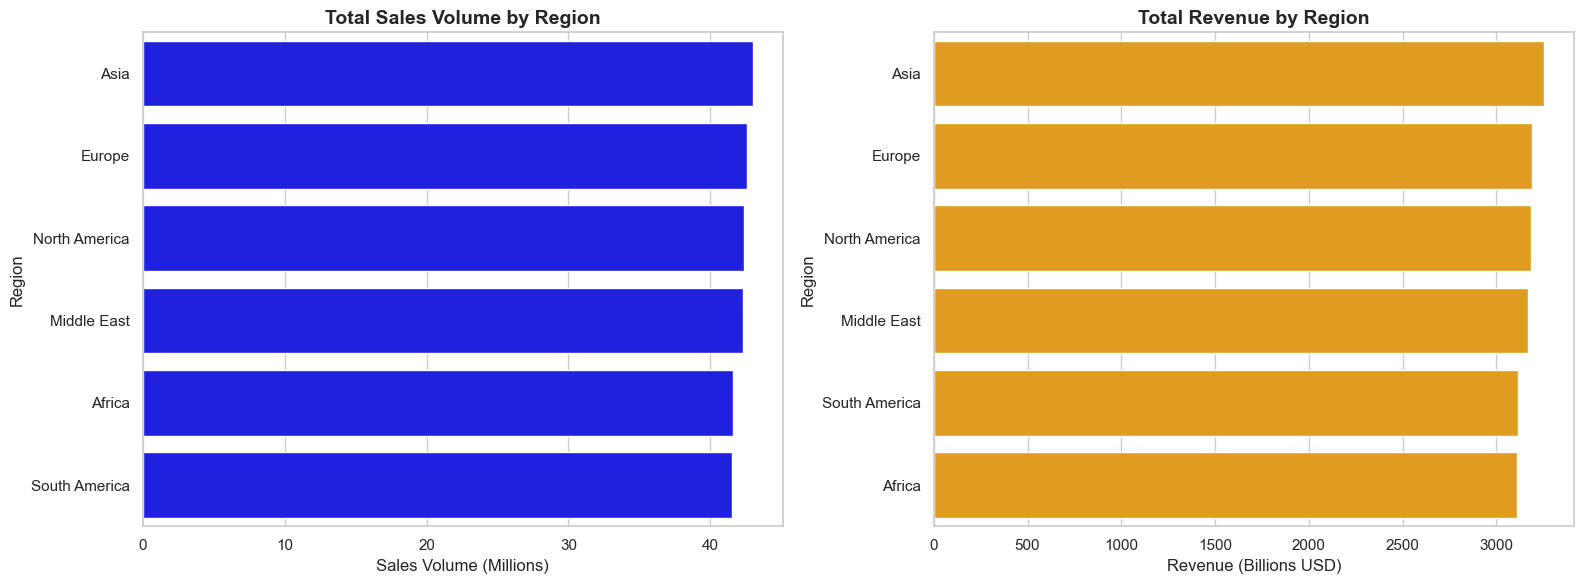

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# --- Sales Volume by Region ---
region_sales = df.groupby("Region")["Sales_Volume"].sum().sort_values(ascending=False).reset_index()
region_sales["Sales_Volume_Millions"] = round(region_sales["Sales_Volume"]/1e6, 2)

sns.barplot(data=region_sales, x="Sales_Volume_Millions", y="Region", color="Blue", ax=axes[0])
axes[0].set_title("Total Sales Volume by Region", fontsize=14, weight="bold")
axes[0].set_xlabel("Sales Volume (Millions)")
axes[0].set_ylabel("Region")

# --- Revenue by Region ---
region_rev = df.groupby("Region")["Revenue"].sum().sort_values(ascending=False).reset_index()
region_rev["Revenue_Billions"] = round(region_rev["Revenue"]/1e9, 2)

sns.barplot(data=region_rev, x="Revenue_Billions", y="Region", color="orange", ax=axes[1])
axes[1].set_title("Total Revenue by Region", fontsize=14, weight="bold")
axes[1].set_xlabel("Revenue (Billions USD)")
axes[1].set_ylabel("Region")

plt.tight_layout()
plt.show()


**Insight:** 
- **Sales Volume:** Asia dominates, followed by Europe and North America. Africa & South America lag behind.  
- **Revenue:** Asia also leads in revenue contribution, highlighting its importance for premium/larger-volume sales.  
- Asia is the strongest market overall, while Africa & South America may represent untapped growth opportunities.

---

### 🔹 4. Sales and Revenue Distribution by Car Color  

**Goal:** Understand customer **color preferences** and how they influence both sales volume and overall revenue.  

**Charts:** Dual horizontal bar charts (side-by-side).  

**EDA Type:** Categorical (customer preference analysis).  

**Structure:**  
- **Left Chart (Blue):**  
  - X-axis → Sales Volume in millions  
  - Y-axis → Car colors  
  - Shows the most popular colors chosen by customers.  

- **Right Chart (Orange):**  
  - X-axis → Revenue in billions USD  
  - Y-axis → Car colors  
  - Highlights which colors contribute most to revenue.  



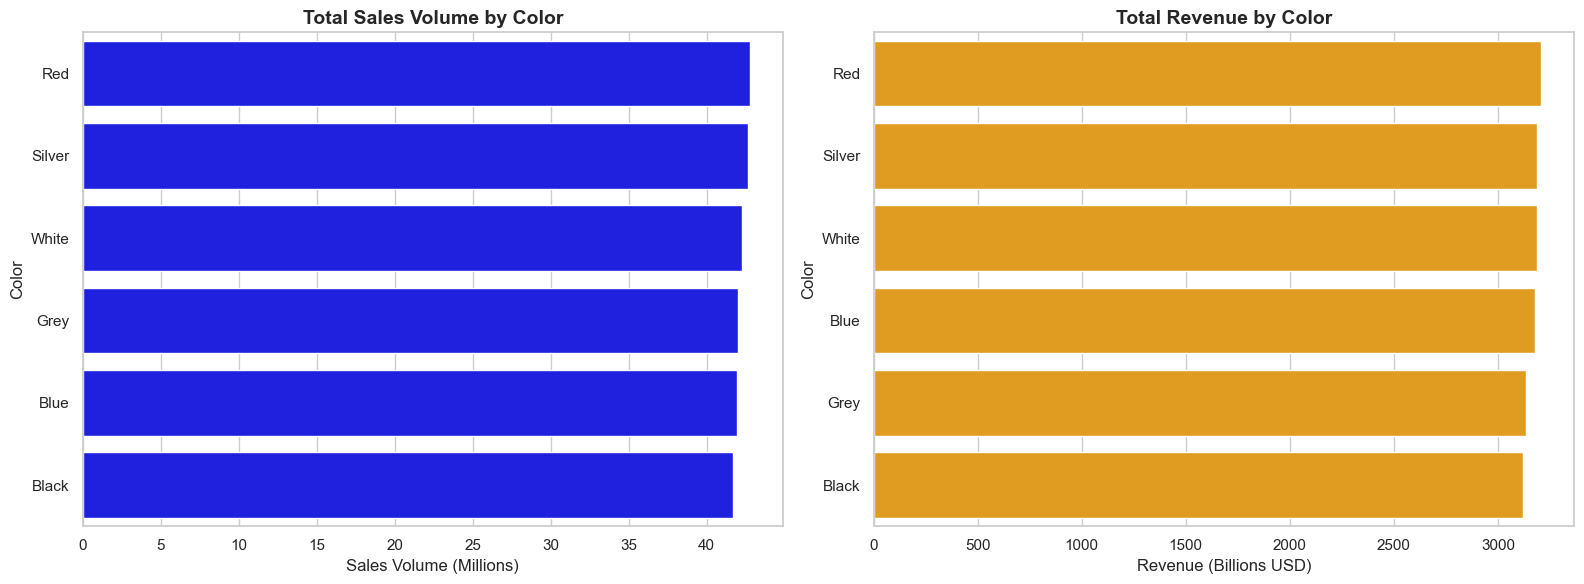

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# --- Sales Volume by Color ---
color_sales = df.groupby("Color")["Sales_Volume"].sum().sort_values(ascending=False).reset_index()
color_sales["Sales_Volume_Millions"] = round(color_sales["Sales_Volume"]/1e6, 2)

sns.barplot(data=color_sales, x="Sales_Volume_Millions", y="Color", color="Blue" , ax=axes[0])
axes[0].set_title("Total Sales Volume by Color", fontsize=14, weight="bold")
axes[0].set_xlabel("Sales Volume (Millions)")
axes[0].set_ylabel("Color")

# --- Revenue by Color ---
color_rev = df.groupby("Color")["Revenue"].sum().sort_values(ascending=False).reset_index()
color_rev["Revenue_Billions"] = round(color_rev["Revenue"]/1e9, 2)

sns.barplot(data=color_rev, x="Revenue_Billions", y="Color", color="orange", ax=axes[1])
axes[1].set_title("Total Revenue by Color", fontsize=14, weight="bold")
axes[1].set_xlabel("Revenue (Billions USD)")
axes[1].set_ylabel("Color")

plt.tight_layout()
plt.show()


**Insight:**
- **Sales Volume:** Red, Silver, and White cars show higher demand compared to other colors.  
- **Revenue:** The same colors dominate revenue, aligning with consumer preference.  
- Popular colors drive both sales and financial performance → inventory planning should focus on these.

---

### 🔹 5. Engine Size Analysis

**Goal**:  
Understand how engine size impacts both sales volume and revenue to identify trends in customer preferences and profitability across different engine capacities.

**Chart Type**:  
Dual line plots (side-by-side):
- Sales Volume by Engine Size  
- Revenue by Engine Size  

**EDA Type**:  
Univariate (Engine Size distribution impact on sales & revenue) with feature-engineering integration.

**Structure/Notes**:  
- Sales volume is aggregated and represented in **millions** for readability.  
- Revenue is aggregated and represented in **billions of USD**.  
- Line plots with markers highlight engine sizes that dominate sales vs. those generating higher revenue.  
- This analysis helps detect whether smaller or larger engines drive market demand versus profitability.  



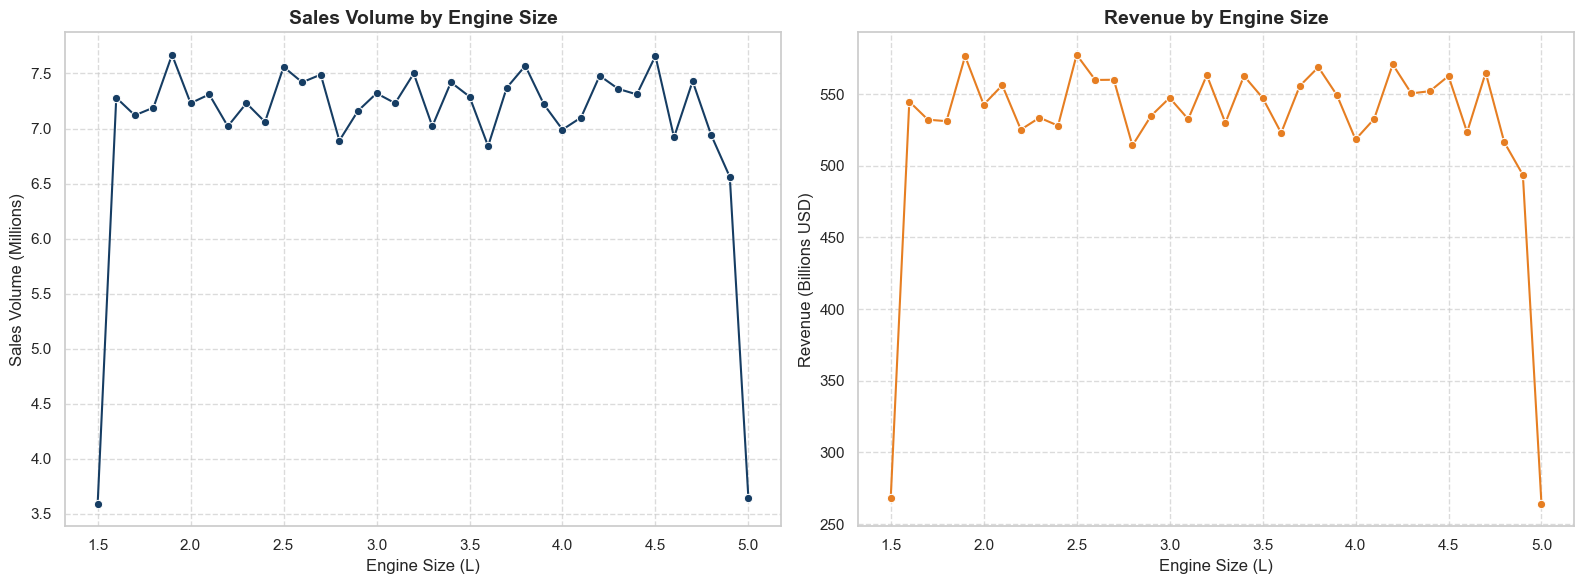

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# --- Aggregate sales volume by engine size ---
engine_sales = df.groupby("Engine_Size_L")["Sales_Volume"].sum().reset_index()
engine_sales["Sales_Volume_Millions"] = round(engine_sales["Sales_Volume"]/1e6, 2)

sns.lineplot(data=engine_sales, x="Engine_Size_L", y="Sales_Volume_Millions", 
             marker="o", color="#163d63", ax=axes[0])
axes[0].set_title("Sales Volume by Engine Size", fontsize=14, weight="bold")
axes[0].set_xlabel("Engine Size (L)")
axes[0].set_ylabel("Sales Volume (Millions)")
axes[0].grid(True, linestyle="--", alpha=0.7)

# --- Aggregate revenue by engine size ---
engine_rev = df.groupby("Engine_Size_L")["Revenue"].sum().reset_index()
engine_rev["Revenue_Billions"] = round(engine_rev["Revenue"]/1e9, 2)

sns.lineplot(data=engine_rev, x="Engine_Size_L", y="Revenue_Billions", 
             marker="o", color="#e67e22", ax=axes[1])
axes[1].set_title("Revenue by Engine Size", fontsize=14, weight="bold")
axes[1].set_xlabel("Engine Size (L)")
axes[1].set_ylabel("Revenue (Billions USD)")
axes[1].grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


**Insight:**
- **Sales Volume:** Mid-range engines (2.0L – 4.0L) consistently sell the most units.  
- **Revenue:** These same engine sizes also generate the most revenue, confirming strong consumer demand.  
- **Extremes:** Very small (<1.6L) and very large (>4.8L) engines see lower volumes, suggesting niche appeal.  
- Mid-range engines are the **sweet spot** for both affordability and profitability.

---

### 🔹 6.  Regional Sales Trends (2010–2024)

**Goal**:  
Analyze how BMW sales volumes are distributed across regions over the years to understand geographic demand trends and identify regions driving growth.

**Chart Type**:  
Stacked bar chart (Sales Volume by Year, segmented by Region)

**EDA Type**:  
Bivariate/Multivariate (Year × Region analysis on Sales Volume)

**Structure/Notes**:  
- Sales volumes are aggregated at the **year-region level** and scaled to **millions** for readability.  
- Distinct color mapping is applied to each region for visual clarity.  
- The stacked structure shows both **total yearly sales trends** and the **regional contribution share**.  
- Highlights shifts in dominance of markets (e.g., Asia vs. Europe) and seasonal/global market variations.  


<Figure size 1200x800 with 0 Axes>

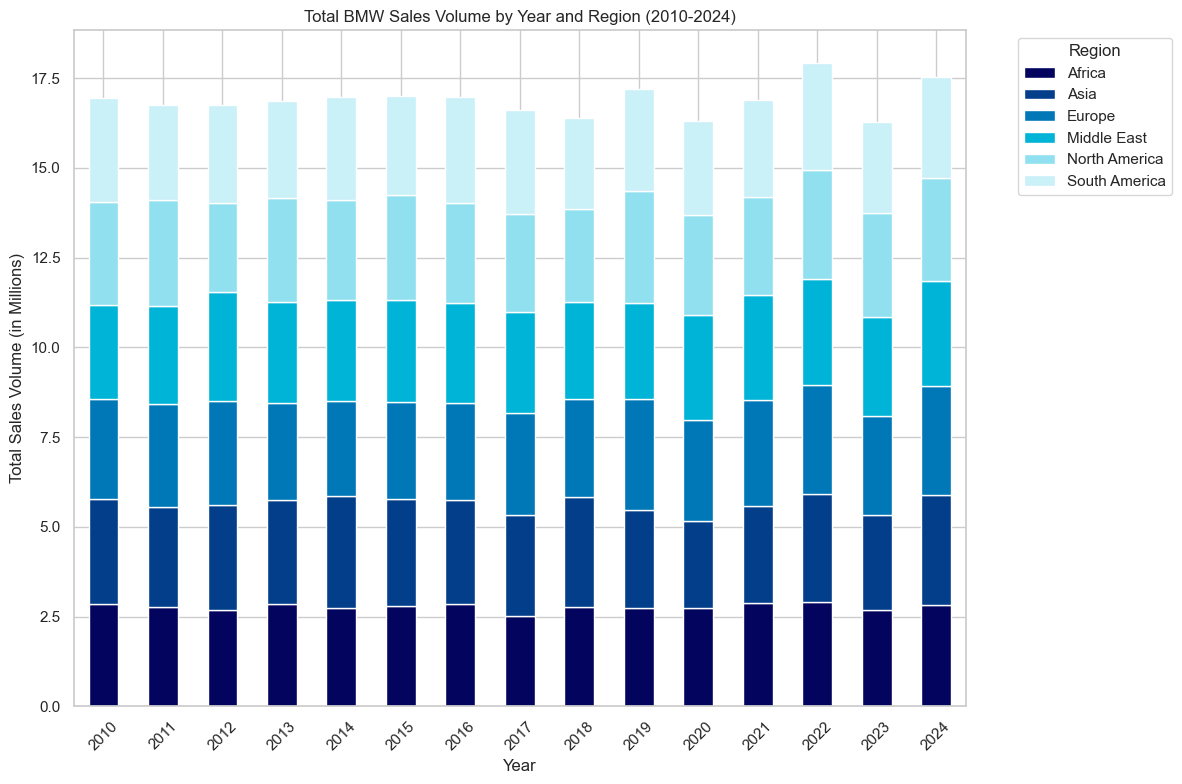

In [21]:

# Group the data by 'Year' and 'Region', then sum the 'Sales_Volume'
stacked_sales = df.groupby(['Year', 'Region'])['Sales_Volume'].sum().unstack()

# Shorten the sales numbers to millions and round to 2 decimal places
stacked_sales = round(stacked_sales / 1000000, 2)

# Define the color mapping for each region
# Assumes the regions are in alphabetical order as a default from unstack()
region_colors = {
    'Africa': '#03045e',
    'Asia': '#023e8a',
    'Europe': '#0077b6',
    'Middle East': '#00b4d8',
    'North America': '#90e0ef',
    'South America': '#caf0f8'
}

# Create a list of colors in the correct order for the plot
colors_list = [region_colors.get(region, 'gray') for region in stacked_sales.columns]

# Create a stacked bar chart with the specified colors
plt.figure(figsize=(12, 8))
stacked_sales.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors_list)

# Set the title and labels
plt.title('Total BMW Sales Volume by Year and Region (2010-2024)')
plt.xlabel('Year')
plt.ylabel('Total Sales Volume (in Millions)')
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Insight**:

- Asia: Dominates sales volume, consistently contributing around 7-10 million units annually, representing over 50% of total BMW sales from 2010–2024.
- Europe and North America: Show steady but lower volumes, with Europe at ~2-3 million units and North America at ~3-5 million, though North America exhibits growth post-2018.
- Other Regions: Middle East, South America, and Africa remain minor contributors (<1 million units combined each year), highlighting BMW's heavy reliance on Asia for growth, potentially vulnerable to regional economic shifts.

---

### 🔹 7. Fuel Type Sales Volume by Region

**Goal:** Understand which fuel types are performing best in terms of sales volume across different regions.

**Chart type:** Heatmap

**EDA type:** Categorical comparison / Pivot table

**Structure/notes:** 
- Created a pivot table with `Region` as rows and `Fuel_Type` as columns, aggregating `Sales_Volume` using sum.
- Used Seaborn `heatmap` to visualize the sales distribution across regions and fuel types.
- Annotated values for clarity and applied the "Blues" color map for better visual distinction.
- Titles and labels are formatted for readability.


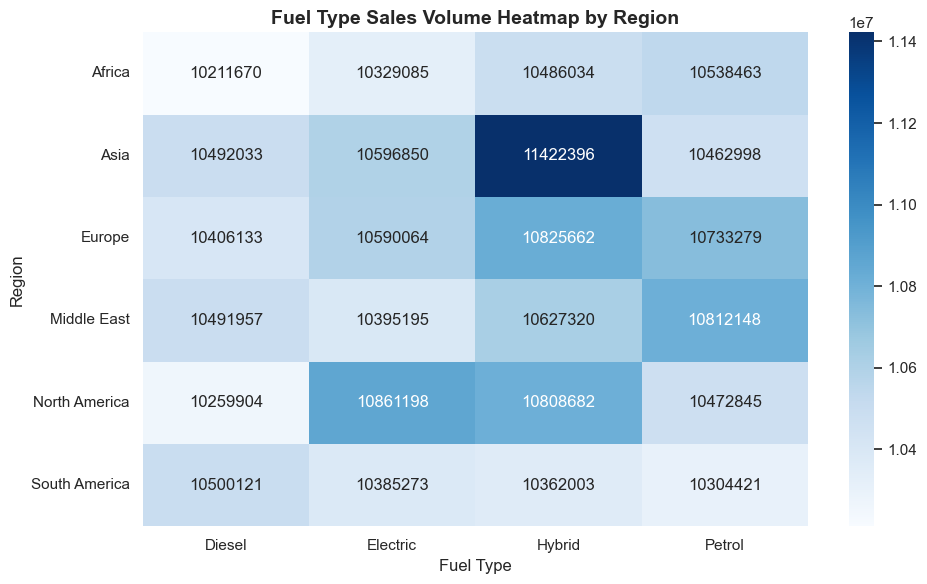

In [22]:
pivot_table = df.pivot_table(values="Sales_Volume", 
                             index="Region", 
                             columns="Fuel_Type", 
                             aggfunc="sum")

plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="Blues")

plt.title("Fuel Type Sales Volume Heatmap by Region", fontsize=14, weight="bold")
plt.xlabel("Fuel Type")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


**Insight**:

- Asia: Leads with the highest sales volume in electric vehicles (1142396 units), significantly outpacing other regions and fuel types.
- North America: Shows a strong preference for electric vehicles (10861198 units), second only to Asia, indicating a notable shift toward electrification.
- Other Regions: Europe, Middle East, Africa, and South America exhibit lower and more balanced sales across diesel, hybrid, and petrol, with electric sales remaining minimal compared to Asia and North America.

---

### 🔹 8. Top 3 Models per Region (Heatmap)

**Goal:** Identify the top 3 selling models in each region and compare their sales volume across regions.

**Chart type:** Heatmap

**EDA type:** Categorical comparison / Pivot table

**Structure/notes:** 
- Aggregated `Sales_Volume` by `Region` and `Model`.
- Selected the top 3 models per region based on sales volume.
- Pivoted the data to have `Model` as rows and `Region` as columns for visualization.
- Used Seaborn `heatmap` with annotations, linewidths, and color bar label for clarity.
- Titles and labels are formatted for readability.


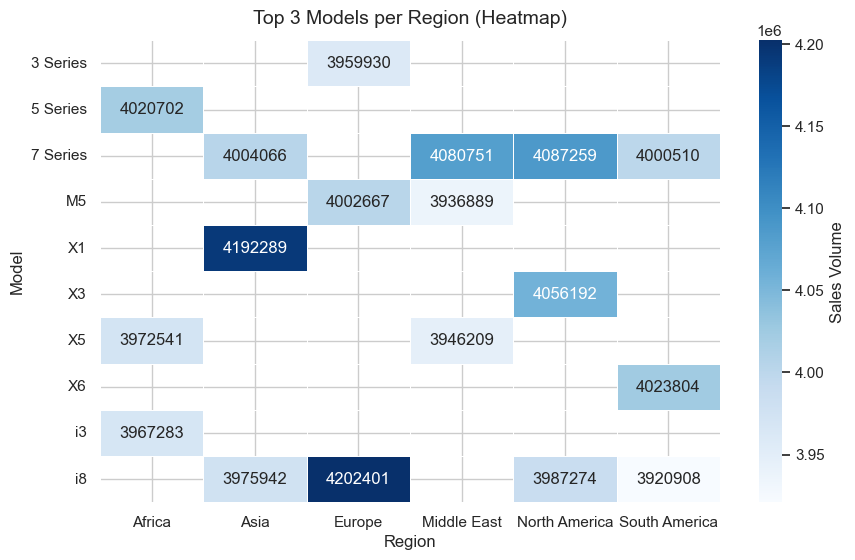

In [23]:
# Aggregate
top_models_region = df.groupby(["Region", "Model"])["Sales_Volume"].sum().reset_index()

# Get top 3 per region
top_n = top_models_region.sort_values(
    ["Region", "Sales_Volume"], ascending=[True, False]
).groupby("Region").head(3)

# Pivot for heatmap
pivot_data = top_n.pivot(index="Model", columns="Region", values="Sales_Volume")
 

sns.heatmap(
    pivot_data, annot=True, fmt=".0f", cmap="Blues", linewidths=0.5, cbar_kws={'label': 'Sales Volume'}
)
plt.title("Top 3 Models per Region (Heatmap)", fontsize=14, pad=12)
plt.ylabel("Model")
plt.xlabel("Region")
plt.show()

**Insight**:

- Asia: Dominates with the highest sales volume, notably for the X1 (4192289 units) and 7 Series (4004066 units), indicating strong demand for premium and SUV models.
- North America: Shows significant sales for the 7 Series (4080751 units) and 5 Series (4020702 units), reflecting a preference for luxury sedans.
- Europe: Leads in 7 Series sales (4087259 units) and has balanced contributions across models like the 3 Series (3959930 units), suggesting a diverse market demand.

---

### 🔹 9. Fuel Type Proportion

**Goal:** Show the overall proportion of different fuel types in the dataset.

**Chart type:** Pie chart

**EDA type:** Categorical distribution

**Structure/notes:** 
- Counted occurrences of each `Fuel_Type` using `value_counts()`.
- Visualized proportions with a pie chart, including labels and percentage annotations.
- Applied a starting angle of 140° for better orientation.
- Added a descriptive title for clarity.


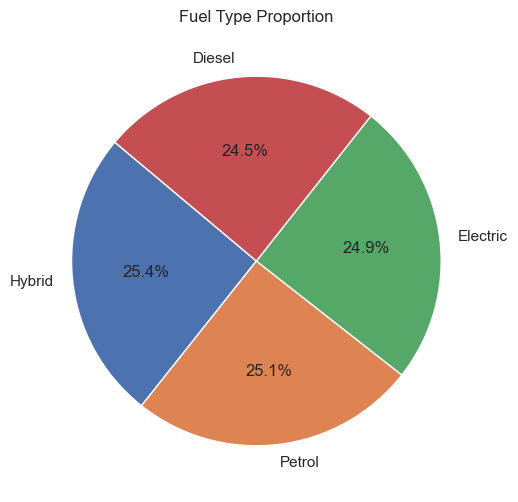

In [24]:
fuel_counts = df['Fuel_Type'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Fuel Type Proportion')
plt.show()

**Insight**:

- Hybrid: Leads with 25.4% of the fuel type proportion, indicating a strong preference for hybrid vehicles.
- Petrol and Electric: Both hold 25.1% and 24.9% respectively, showing a nearly equal split and growing adoption of electric vehicles.
- Diesel: Trails slightly at 24.5%, suggesting a modest decline or stabilization in diesel usage compared to other fuel types.

---

### 🔹 10. Total BMW Sales Volume by Year and Fuel Type (2010–2024)

**Goal:** Compare how sales volume of different fuel types has changed over time (2010–2024).

**Chart type:** Grouped bar chart

**EDA type:** Temporal trend + Categorical comparison

**Structure/notes:** 
- Grouped the data by `Year` and `Fuel_Type`, aggregating `Sales_Volume` by sum.
- Converted sales numbers into millions for easier readability.
- Applied custom color mapping for each fuel type (`Petrol`, `Diesel`, `Hybrid`, `Electric`).
- Plotted as a grouped bar chart to show yearly fuel-type-wise performance.
- Y-axis starts at 3.5M to emphasize differences between categories.
- Added title, axis labels, rotated x-ticks for readability, legend placement outside the chart, and a grid for clarity.


<Figure size 1200x800 with 0 Axes>

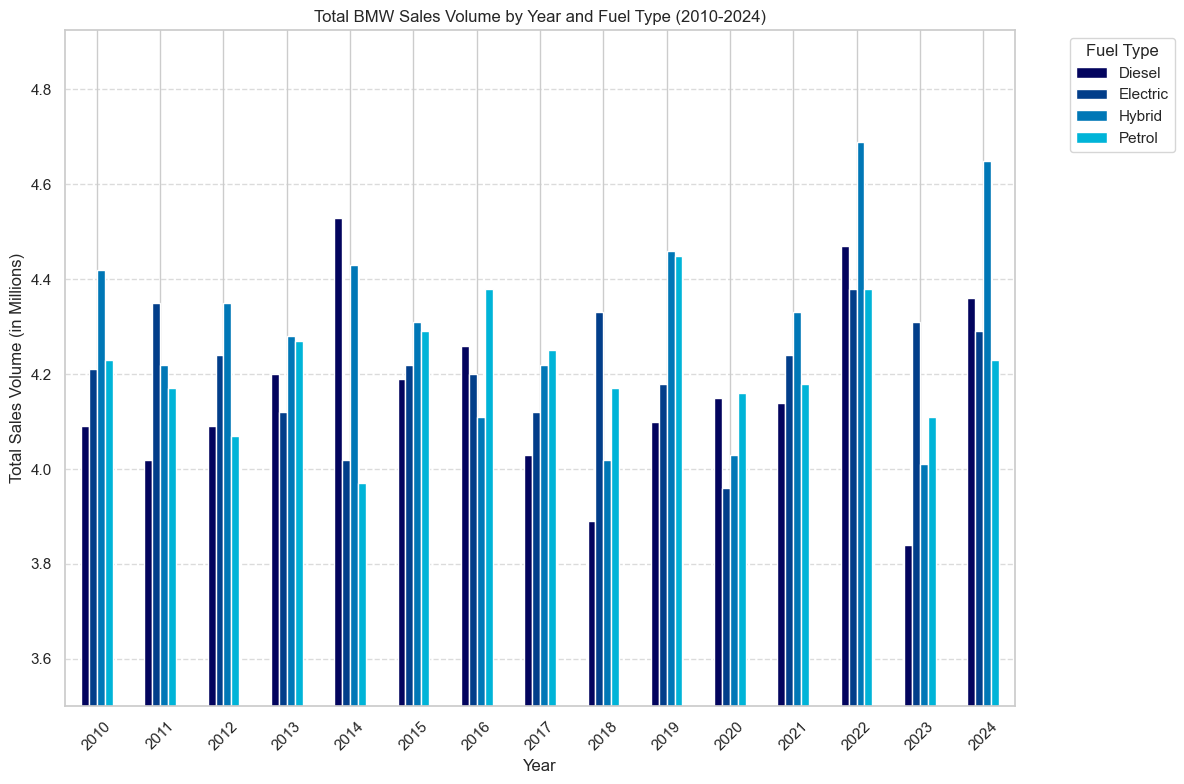

In [25]:

# Group the data by 'Year' and 'Fuel_Type', then sum the 'Sales_Volume'
sales_by_year_and_fuel_type = df.groupby(['Year', 'Fuel_Type'])['Sales_Volume'].sum().unstack()

# Shorten the sales numbers to millions and round to 2 decimal places
sales_by_year_and_fuel_type = round(sales_by_year_and_fuel_type / 1000000, 2)

# Define the color mapping as requested by the user
fuel_type_colors = {
    'Petrol': '#00b4d8',
    'Diesel': '#03045e',
    'Hybrid': '#0077b6',
    'Electric': '#023e8a'
}

# Create a list of colors based on the columns of the DataFrame
colors_list = [fuel_type_colors[fuel_type] for fuel_type in sales_by_year_and_fuel_type.columns]

# Create a grouped bar chart with the specified colors
plt.figure(figsize=(12, 8))
sales_by_year_and_fuel_type.plot(kind='bar', figsize=(12, 8), color=colors_list)

# Set the y-axis to start at 3.5 million
plt.ylim(3.5)

# Set the title and labels
plt.title('Total BMW Sales Volume by Year and Fuel Type (2010-2024)')
plt.xlabel('Year')
plt.ylabel('Total Sales Volume (in Millions)')
plt.xticks(rotation=45)
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


**Insight**:

- Petrol: Consistently leads with sales volumes peaking at ~4.6M units in 2024, showing strong growth from ~4.0M in 2010.
- Diesel: Maintains a steady presence, peaking at ~4.4M units in 2013, but declines to ~3.8M by 2023, indicating a shift away from diesel.
- Hybrid: Shows significant growth, rising from ~4.0M in 2010 to ~4.5M in 2024, while electric remains minimal, suggesting a gradual shift toward hybrid technology.

## Distribution of Price

---

### 🔹 11. Distribution of Vehicle Prices (USD)

**Goal:** Analyze the distribution of vehicle prices to identify pricing patterns, spread, and skewness.

**Chart type:** Histogram with KDE (Kernel Density Estimate)

**EDA type:** Univariate distribution

**Structure/notes:** 
- Plotted histogram of `Price_USD` with 30 bins for balanced granularity.
- Added KDE curve to visualize the smooth distribution trend.
- Useful for spotting skewness, concentration of prices, and potential outliers.
- Simple title added for clarity.


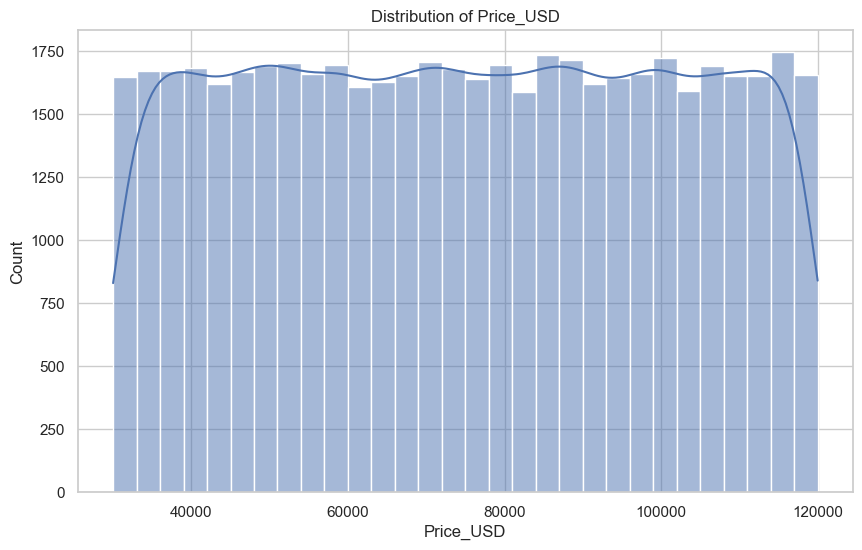

In [26]:
sns.histplot(df['Price_USD'], kde=True, bins=30)
plt.title('Distribution of Price_USD')
plt.show()

**Insight**:

- Price Range: The majority of sales fall between $6,000 and $10,000 USD, with a peak count of ~1750 units around $7,000-$8,000.
- Distribution: Sales taper off significantly below $4,000 and above $12,000, indicating a concentration in the mid-range price segment.
- Trend: The distribution shows a slight skew toward higher prices within the mid-range, with fewer units sold at the extremes.

---

### 🔹 12. Distribution of Sales Classification

**Goal:** Show how sales are distributed across different classification categories.

**Chart type:** Bar chart

**EDA type:** Categorical distribution

**Structure/notes:** 
- Counted occurrences of each `Sales_Classification` using `value_counts()`.
- Plotted counts as a bar chart with the `Set2` color palette for better distinction.
- Added title and axis labels for clarity.
- Useful for identifying dominant and less frequent sales classifications.


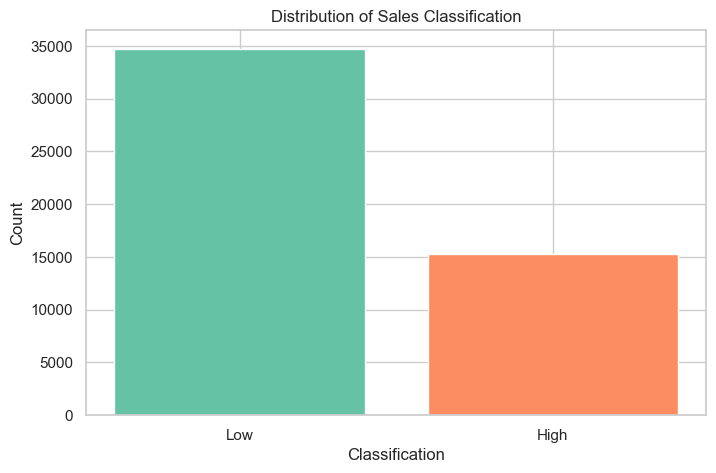

In [27]:
# Count values for each classification
counts = df["Sales_Classification"].value_counts()

# Plot using matplotlib
plt.figure(figsize=(8,5))
plt.bar(counts.index, counts.values, color=plt.cm.Set2.colors)  # use Set2 palette

# Titles and labels
plt.title("Distribution of Sales Classification")
plt.xlabel("Classification")
plt.ylabel("Count")

plt.show()

**Insight**:

- Low Classification: Dominates with approximately 35,000 units, indicating a significant majority of sales fall in the lower category.
- High Classification: Accounts for around 15,000 units, showing a much smaller proportion of sales in the higher category.
- Distribution: The data suggests a strong preference or higher volume for the lower sales classification compared to the higher one.

---

### 🔹 13. Total Revenue by Sales Classification

**Goal:** Compare the revenue contribution of different sales classification categories.

**Chart type:** Bar chart

**EDA type:** Categorical aggregation

**Structure/notes:** 
- Aggregated `Revenue` by `Sales_Classification`.
- Converted revenue values into billions (USD) for better readability.
- Used `Set2` colormap for distinct category colors.
- Plotted as a bar chart to clearly highlight revenue differences across classifications.
- Added descriptive title and axis labels for clarity.


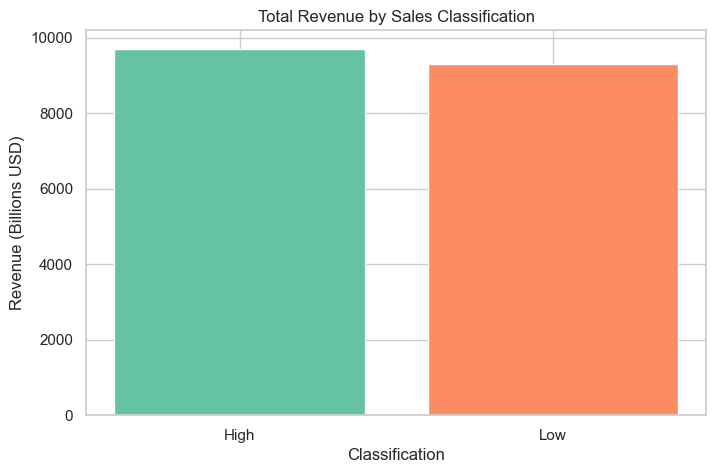

In [28]:
# Data
rev_class = df.groupby("Sales_Classification")["Revenue"].sum().reset_index()
rev_class["Revenue_Billions"] = rev_class["Revenue"] / 1e9

# Plot
plt.figure(figsize=(8,5))
plt.bar(rev_class["Sales_Classification"], 
        rev_class["Revenue_Billions"], 
        color=plt.cm.Set2.colors[:len(rev_class)])  # use mako colormap

# Titles and labels
plt.title("Total Revenue by Sales Classification")
plt.xlabel("Classification")
plt.ylabel("Revenue (Billions USD)")

plt.show()

**Insight**:

- High Classification: Generates approximately $10,000 billion USD, indicating a substantial revenue contribution from higher sales categories.
  
- Low Classification: Contributes around $8,000 billion USD, showing a significant but slightly lower revenue compared to the high category.

  
- Revenue Distribution: The high classification outperforms the low classification, suggesting higher profitability or pricing in the higher sales segment.

---

### 🔹 14. Fuel Type Distribution by Sales Classification

**Goal:** Analyze how different fuel types are distributed across various sales classifications.

**Chart type:** Grouped bar chart (Countplot)

**EDA type:** Categorical comparison

**Structure/notes:** 
- Used `countplot` with `Fuel_Type` on the x-axis and `Sales_Classification` as the hue.
- Displays how each fuel type is spread across sales classifications.
- Legend moved outside the plot for better readability.
- Added descriptive title, axis labels, and layout adjustments.


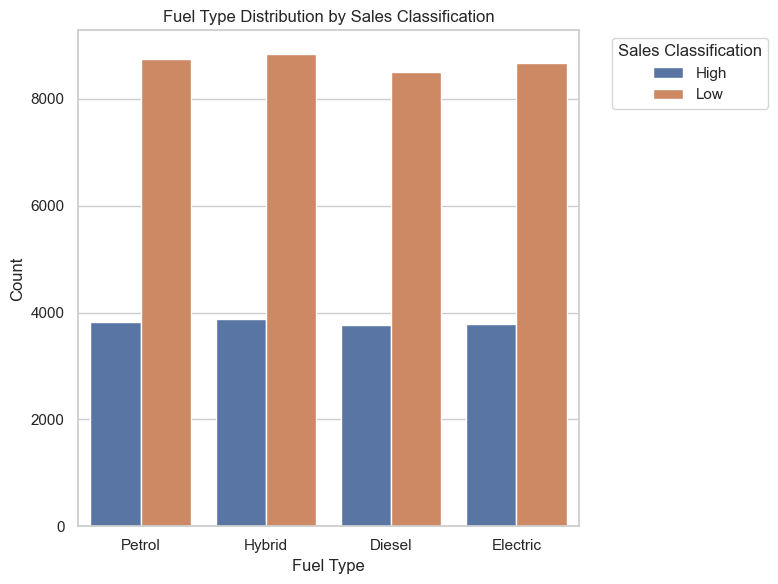

In [29]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="Fuel_Type", hue="Sales_Classification")

plt.title("Fuel Type Distribution by Sales Classification")
plt.xlabel("Fuel Type")
plt.ylabel("Count")

# Move legend outside
plt.legend(title="Sales Classification", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


**Insight**:

- Low Classification: Dominates across all fuel types, with petrol leading at 8,000 units, followed by hybrid, diesel, and electric at similar levels (~7,500-8,000 units).
- High Classification: Consistently lower, with all fuel types around 4,000 units, indicating a smaller but uniform distribution across petrol, hybrid, diesel, and electric.
- Fuel Preference: Petrol and hybrid show the highest total counts in the low category, suggesting stronger demand in these segments.

---

### 🔹 15. Region Distribution by Sales Classification

**Goal:** Compare how sales classifications are distributed across different regions.

**Chart type:** Grouped bar chart (Countplot)

**EDA type:** Categorical comparison

**Structure/notes:** 
- Plotted `Region` on the x-axis with `Sales_Classification` as the hue.
- Shows how each classification contributes within each region.
- Legend placed outside the plot for improved readability.
- Added descriptive title, axis labels, and layout adjustments for clarity.


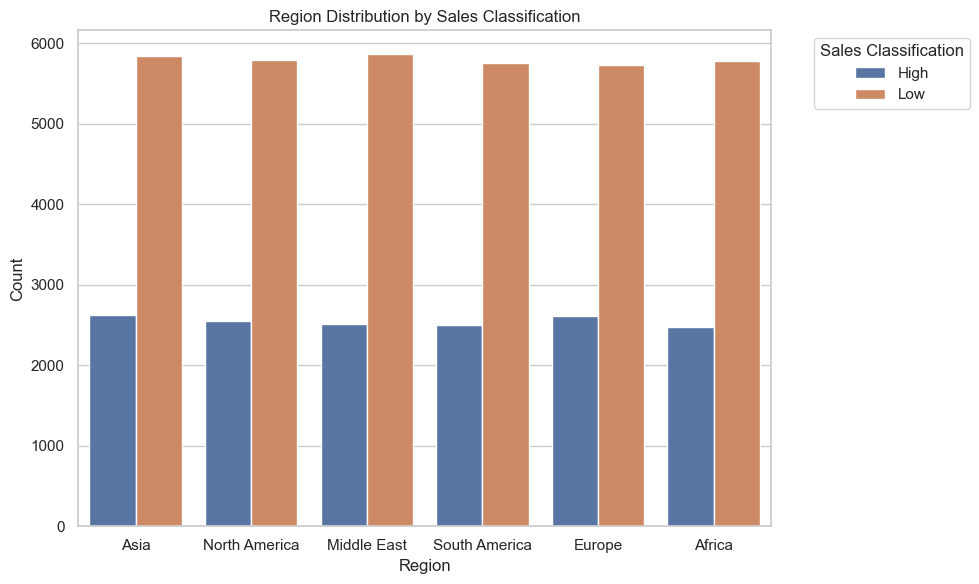

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Region", hue="Sales_Classification")

plt.title("Region Distribution by Sales Classification")
plt.xlabel("Region")
plt.ylabel("Count")

# Move legend outside the plot
plt.legend(title="Sales Classification", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


**Insight**:

- Low Classification: Consistently leads across all regions, with counts around 6,000 units, with Asia and North America showing the highest at ~6,000 units each.
- High Classification: Remains steady at ~3,000 units across all regions, indicating a uniform but lower distribution compared to the low category.
- Regional Distribution: Asia, North America, and Europe show the highest total counts, suggesting these regions drive the majority of sales in both classifications.

---

### 🔹 16.  Color Distribution by Sales Classification

**Goal:** Explore how different vehicle colors are distributed across various sales classifications.

**Chart type:** Grouped bar chart (Countplot)

**EDA type:** Categorical comparison

**Structure/notes:** 
- Plotted `Color` on the x-axis with `Sales_Classification` as the hue.
- Shows how each sales classification is represented across different vehicle colors.
- Legend moved outside (to the right) for better readability.
- Added descriptive title, axis labels, and layout adjustments for clarity.


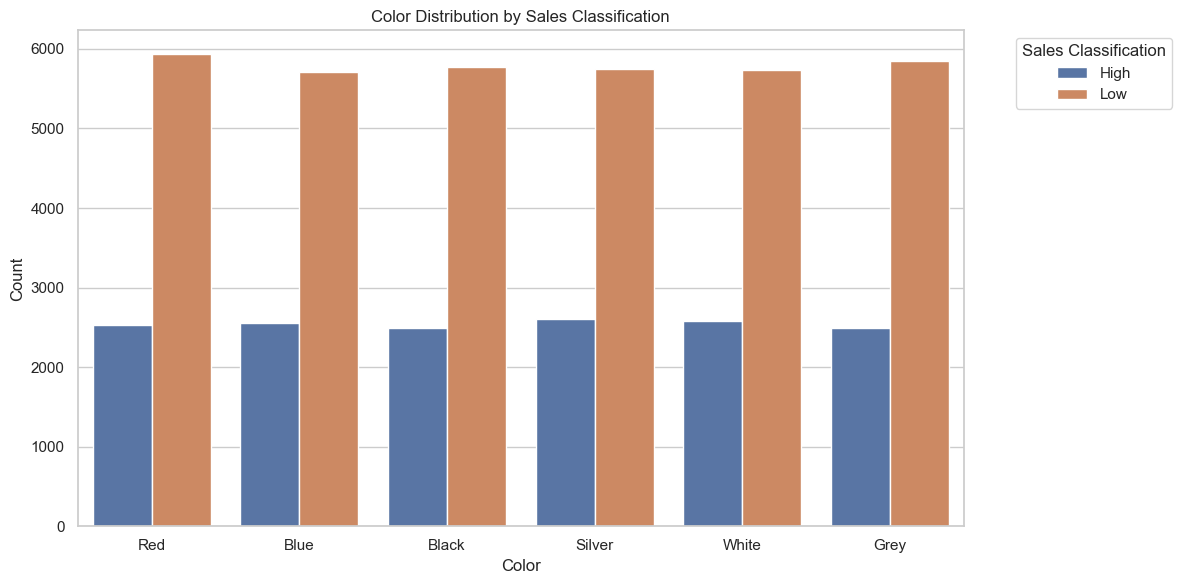

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Color", hue="Sales_Classification")

plt.title("Color Distribution by Sales Classification")
plt.xlabel("Color")
plt.ylabel("Count")

# Move legend outside (to the right)
plt.legend(title="Sales Classification", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


**Insight**:

- Low Classification: Leads across all colors, with counts around 6,000 units, showing a strong preference for red, blue, black, silver, white, and grey.
- High Classification: Remains consistent at ~3,000 units for each color, indicating a smaller but uniform distribution across all colors.
- Color Preference: Red, blue, and black show the highest total counts in the low category, suggesting these colors are more popular among lower sales classifications.

---

### 🔹 17.  Yearly Distribution by Sales Classification

**Goal:** Examine how sales classifications vary across different years.

**Chart type:** Grouped bar chart (Countplot)

**EDA type:** Temporal trend + Categorical comparison

**Structure/notes:** 
- Plotted `Year` on the x-axis with `Sales_Classification` as the hue.
- Highlights how the mix of sales classifications changes over time.
- Legend positioned outside (to the right) for readability.
- Added descriptive title, axis labels, and layout adjustments for clarity.


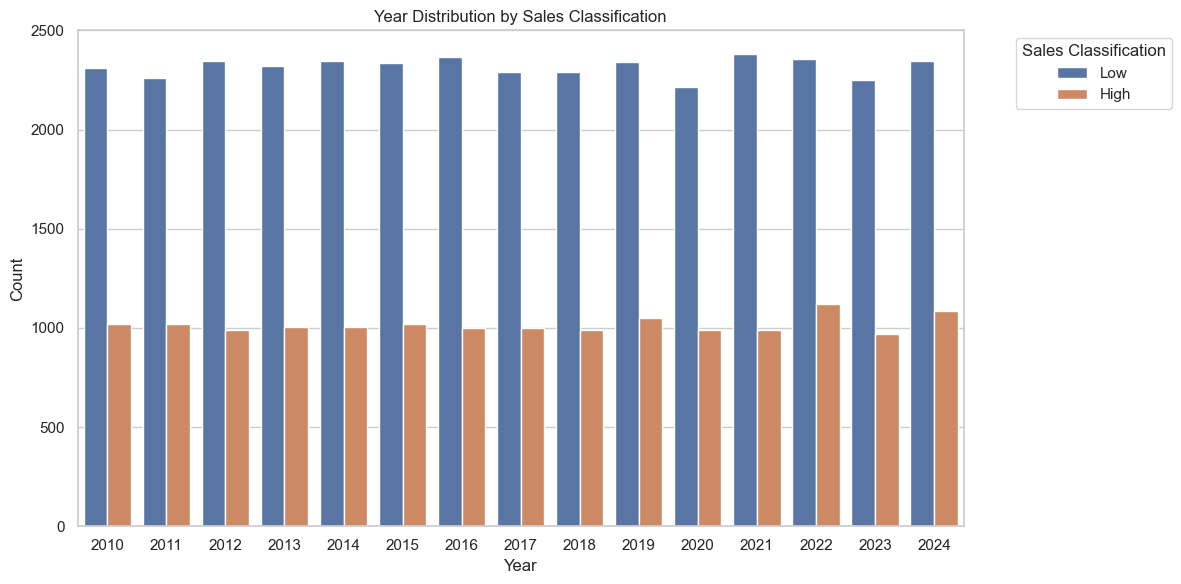

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Year", hue="Sales_Classification")

plt.title("Year Distribution by Sales Classification")
plt.xlabel("Year")
plt.ylabel("Count")

# Move legend outside (to the right)
plt.legend(title="Sales Classification", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


**Insight**:

- Low Classification: Dominates consistently with counts around 2,500 units annually from 2010 to 2024, showing stable performance over the years.
- High Classification: Remains steady at ~1,000 units per year, indicating a smaller but constant contribution across the same period.
- Trend: Both classifications show a slight dip around 2019-2020, followed by a recovery, with no significant year-to-year variation.

---

## Key Bussiness Question

In [36]:
# (1) Most profitable model
q1 = (df.assign(revenue=df["Price_USD"] * df["Sales_Volume"])
        .groupby("Model")["revenue"].sum())
most_profitable_model = q1.idxmax()
most_profitable_value = int(q1.max())

# (2) Region with highest avg price
q2 = df.groupby("Region")["Price_USD"].mean()
premium_region = q2.idxmax()
premium_value = round(float(q2.max()), 2)

# (3) Year with highest revenue
q3 = (df.assign(revenue=df["Price_USD"] * df["Sales_Volume"])
        .groupby("Year")["revenue"].sum())
best_year = q3.idxmax()
best_year_value = int(q3.max())

# (4) Model dominating each region (market share %)
region_sales = df.groupby(["Region", "Model"])["Sales_Volume"].sum().reset_index()
total_region_sales = region_sales.groupby("Region")["Sales_Volume"].sum().reset_index(name="Region_total")
q4 = region_sales.merge(total_region_sales, on="Region")
q4["Market_Share_Percent"] = (q4["Sales_Volume"] * 100 / q4["Region_total"]).round(2)
region_dominance = q4.sort_values(["Region","Market_Share_Percent"], ascending=[True,False]).drop_duplicates("Region")

# (5) Fastest growth model
yearly_sales = df.groupby(["Model", "Year"])["Sales_Volume"].sum().reset_index()
yearly_sales["Prev"] = yearly_sales.groupby("Model")["Sales_Volume"].shift(1)
yearly_sales["Growth"] = yearly_sales["Sales_Volume"] - yearly_sales["Prev"]
q5 = yearly_sales.dropna().sort_values("Growth", ascending=False).head(1)
fastest_growth_model = q5.iloc[0]["Model"]
fastest_growth_value = int(q5.iloc[0]["Growth"])

# (6) Biggest decline model
q6 = yearly_sales.dropna().sort_values("Growth", ascending=True).head(1)
biggest_decline_model = q6.iloc[0]["Model"]
biggest_decline_value = int(q6.iloc[0]["Growth"])

# (7) Region contributing most to global revenue
q7 = (df.assign(revenue=df["Price_USD"] * df["Sales_Volume"])
        .groupby("Region")["revenue"].sum())
top_region = q7.idxmax()
top_region_value = int(q7.max())

# (8) Global bestseller model
q8 = df.groupby("Model")["Sales_Volume"].sum()
bestseller_model = q8.idxmax()
bestseller_value = int(q8.max())

# --- Put them into a dictionary ---
report_dict = {
    "Most profitable model": f"{most_profitable_model} ({most_profitable_value:,})",
    "Which region buys the most premium cars ?": f"{premium_region} ({premium_value:,})",
    "Which year had the highest total sales revenue?": f"{best_year} ({best_year_value:,})",
    **{f"Which model dominates {row.Region}? (market share %)": f"{row.Model} ({row.Market_Share_Percent}%)" 
       for _, row in region_dominance.iterrows()},
    "Which model had the fastest growth between years?": f"{fastest_growth_model} ({fastest_growth_value:,})",
    "Which model declined the most in sales?": f"{biggest_decline_model} ({biggest_decline_value:,})",
    "Which region contributes the most to global revenue?": f"{top_region} ({top_region_value:,})",
    "Which model is the global bestseller across all years?": f"{bestseller_model} ({bestseller_value:,})"
}

# --- Convert into a nice DataFrame ---
report_df = pd.DataFrame(
    [(k, v) for k, v in report_dict.items()],
    columns=["Question", "Answer"]
)
# Save Report as CSV
report_df.to_csv('report.csv')

# view final report
report_df


,Question,Answer
0,Most profitable model,"7 Series (1,790,070,249,282)"
1,Which region buys the most premium cars ?,"Asia (75,554.93)"
2,Which year had the highest total sales revenue?,"2022 (1,344,427,738,820)"
3,Which model dominates Africa? (market share %),5 Series (9.67%)
4,Which model dominates Asia? (market share %),X1 (9.76%)
5,Which model dominates Europe? (market share %),i8 (9.88%)
6,Which model dominates Middle East? (market sha...,7 Series (9.64%)
7,Which model dominates North America? (market s...,7 Series (9.64%)
8,Which model dominates South America? (market s...,X6 (9.68%)
9,Which model had the fastest growth between years?,"X5 (369,300)"


---

## Key Insights:

- BMW's sales volume has remained stable between 16.3M and 17.9M units from 2010 to 2024, with Asia leading, followed by Europe and North America, while Africa and South America offer growth potential.
  
- Revenue shows volatility, peaking at ~$1.34T in 2022 and dipping to ~1.22T in 2023, influenced by pricing, product mix, and external factors.

- Mid-range engines (2.0L – 4.0L) dominate sales and revenue, while niche markets for <1.6L and >4.8L engines remain limited.

- Popular colors (red, silver, white) drive both sales and revenue, suggesting a focus on these for inventory planning.

- Key insights include Asia's dominance, electric and hybrid growth (25.4% and 25.1%), and the 7 Series' strong performance.

- Petrol sales peaked at ~4.6M in 2024, while diesel declined to ~3.8M by 2023; prices peak at `$7,000-$8,000`.

- Low classification leads with 35,000 units vs. 15,000 for high, yet high generates `$10,000B vs. $8,000B` in revenue.

- A slight 2019-2020 sales dip suggests external market impacts.

- Asia's critical role and optimization for mid-range engines, preferred colors, and hybrid/petrol types can boost BMW's profitability.


---

## Recommendations for Stakeholders:

- **Market Expansion Focus**: Prioritize investment in Africa and South America, where sales volumes and revenue contributions are currently low, to tap into untapped growth potential and diversify market presence beyond Asia, Europe, and North America.
  
- **Product Strategy Optimization**: Emphasize mid-range engines (2.0L – 4.0L) in production and marketing, as they drive the highest sales and revenue, while reducing focus on niche <1.6L and >4.8L engines with limited demand.

- **Color and Inventory Planning**: Increase stock and promote vehicles in red, silver, and white, which dominate sales and revenue, to align inventory with consumer preferences and boost financial performance.

- **Fuel Type Transition**: Accelerate the shift toward hybrid (25.4%) and electric vehicles, especially in Asia and North America, while capitalizing on the recent peak in petrol sales (4.6M in 2024) and addressing the decline in diesel (3.8M by 2023).

- **Pricing Strategy**: Maintain a mid-range price focus between `$6,000 and $10,000 USD`, with emphasis on the `$7,000-$8,000` sweet spot, to sustain high sales volumes and cater to the dominant low classification segment.

- **Revenue Maximization**: Target the high classification segment, which generates `$10,000B vs. $8,000B` despite lower volume (15,000 vs. 35,000 units), by enhancing premium offerings to improve profitability.

- **Regional and Seasonal Adjustments**: Strengthen marketing and supply chain resilience in Asia, the leading market, and prepare for potential dips like the 2019-2020 sales decline by monitoring external economic factors.

- **Model Prioritization**: Leverage the 7 Series' strong performance across regions to anchor brand prestige, while supporting hybrid and electric variants to meet evolving consumer trends.


---